# [Jupyter]Classification(TF).ipynb
Description   : Neural network for classification using tensorflow 2

## 1. 이항 분류(Binary Classification)

In [39]:
import pandas as pd
import os

# 경로 초기화
os.chdir(r"C:\Users\TitusChoi\Desktop\Library\CodeLion\AI")

red = pd.read_csv('./datasets/winequality-red.csv', sep = ';')
white = pd.read_csv('./datasets/winequality-white.csv', sep = ';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [40]:
red['type'] = 0 # red 비율 0에 할당
white['type'] = 1 # white 비율 1에 할당

print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) # 두개의 데이터 셋을 합치는 concat 메서드
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

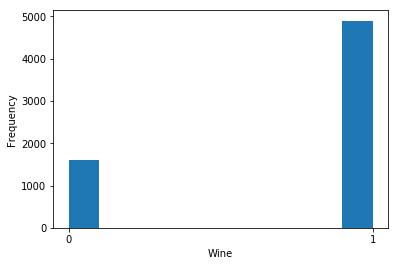

1    4898
0    1599
Name: type, dtype: int64


In [41]:
# 레드 와인과 화이트 와인 type histogram
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1]) # 눈금 표시
plt.xlabel('Wine')
plt.ylabel('Frequency')
plt.show()

print(wine['type'].value_counts()) # 실제 비율을 출력해주는 함수

데이터 정규화 공식은 아래와 같다.
$$x_{normalization} = {\frac{x - x_{min}}{x_{max} - x_{min}}}$$
이를 적용해서 데이터를 만들어주자.

In [42]:
# 데이터 정규화(Normalization)
wine_normal = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_normal.head())
print(wine_normal.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [43]:
# tensorflow를 활용하기 위해 numpy array 활용
import numpy as np
wine_shuffle = wine_normal.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4288       0.264463          0.080000     0.198795  ...  0.362319  0.500000   1.0
1403       0.280992          0.166667     0.198795  ...  0.289855  0.833333   0.0
4613       0.165289          0.126667     0.120482  ...  0.260870  0.333333   1.0
3494       0.239669          0.106667     0.216867  ...  0.420290  0.500000   1.0
1699       0.206612          0.120000     0.174699  ...  0.521739  0.500000   1.0

[5 rows x 13 columns]
<class 'numpy.ndarray'>
[[0.26446281 0.08       0.19879518 0.06288344 0.03488372 0.08333333
  0.16129032 0.09465973 0.12403101 0.17977528 0.36231884 0.5
  1.        ]
 [0.28099174 0.16666667 0.19879518 0.01687117 0.08637874 0.00694444
  0.01612903 0.17139001 0.39534884 0.49438202 0.28985507 0.83333333
  0.        ]
 [0.16528926 0.12666667 0.12048193 0.10276074 0.05149502 0.14236111
  0.3202765  0.14092925 0.33333333 0.14606742 0.26086957 0.33333333
  1.        ]
 [0.23966942 0.106

In [44]:
# 훈련 데이터와 테스트 데이터 분할
import tensorflow as tf

data_idx = int(len(wine_np)) # 총 데이터
train_idx = int(len(wine_np) * 0.8) # 80% 데이터 훈련
print('총 데이터 기준 index :', data_idx)
print('학습 데이터 기준 index :', train_idx)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

총 데이터 기준 index : 6497
학습 데이터 기준 index : 5197
[0.26446281 0.08       0.19879518 0.06288344 0.03488372 0.08333333
 0.16129032 0.09465973 0.12403101 0.17977528 0.36231884 0.5       ]
1.0
[0.16528926 0.08       0.20481928 0.00613497 0.04318937 0.13541667
 0.1843318  0.05436669 0.60465116 0.11235955 0.53623188 0.33333333]
1.0


In [45]:
# tf용 원-핫 인코딩
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0. 1.]
[0. 1.]


이번에 최종 단에 활용할 활성화 함수는 softmax이며, 정의는 아래와 같다.
$$f(x) = {\frac{e^{x_i}}{\sum_{k=1}^N e^{x_k}}}$$

In [46]:
# tf 분류 구축, 마지막 레이어에 sofrmax activation function 활용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 48, activation='relu', input_shape = (12,)),
    tf.keras.layers.Dense(units = 24, activation='relu'),
    tf.keras.layers.Dense(units = 12, activation='relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_25 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_26 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 와인 분류
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.3706 - accuracy: 0.8627 - val_loss: 0.0472 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9790 - val_loss: 0.0761 - val_accuracy: 0.9746
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9779 - val_loss: 0.0411 - val_accuracy: 0.9908
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9878 - val_loss: 0.0469 - val_accuracy: 0.9877
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9879 - val_loss: 0.0655 - val_accuracy: 0.9831
Epoch 

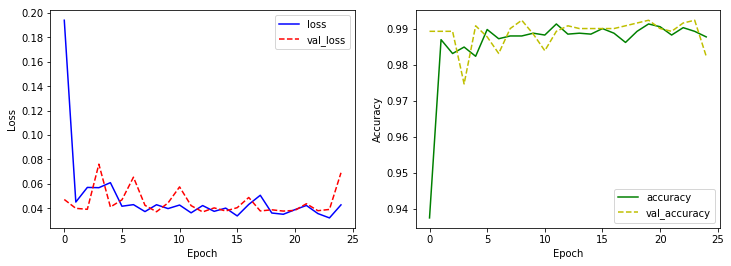

In [48]:
# 분류 모델 시각화
plt.figure(figsize=(12, 4)) # 시각화 크기 정의

plt.subplot(1, 2, 1) # 시각화 구역 1번에 할당
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # 시각화 구역 1번에 할당
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'y--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
# 따로 분류해둔 테스트 값에 모델 평가 시작
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9838


[0.0516790896654129, 0.983846127986908]